# 머신러닝 프로젝트 3조
## 12/28

In [3]:
import pandas as pd
import numpy as np

In [4]:
corp = pd.read_csv('corp3.csv', encoding='utf-8')
corp.head()

,Unnamed: 0,기업명,기업구분2,기업구분,사원수2,사원수,설립일(업력),홈페이지,지역,별점,입사율,퇴사율
0,1,(주)페이타랩,중소기업,"중소기업, 스타트업, 주식회사, 병역특례..",52,52 명 (2022년 기준),2018년 2월 28일 (업력 4년),passorder.co.kr,부산 부산진구,4.3,114.71 % (39 명),64.71 % (22 명)
1,3,(주)엠제이플렉스,중소기업,"중소기업, 스타트업, 외부감사법인, 주식..",930,930 명 (2022년 기준),2005년 3월 24일 (업력 17년),www.mjplex.co.kr,서울 구로구,2.3,89.94 % (876 명),97.84 % (953 명)
2,5,(주)앰진,중소기업,"중소기업, 주식회사",0,0,2012년 6월 13일 (업력 10년),www.amgine.co.kr,서울 송파구,3.0,40.00 % (8 명),30.00 % (6 명)
3,6,(주)도킹블록,중소기업,"중소기업, 주식회사",11,11 명 (2022년 기준),2019년 3월 6일 (업력 3년),dockingblock.com,서울 강남구,0.0,120.00 % (6 명),100.00 % (5 명)
4,7,(주)헥토이노베이션,중소기업,"코스닥, 중소기업, 주식회사, 병역특례 ..",140,140 명 (2022년 기준),0,https://www.hectoinnovation.co.kr/,서울 강남구,3.3,120.00 % (6 명),100.00 % (5 명)


## 사원수 0명인 값 회사 Search해서 사원수 값 채워넣기

- 각자 25개씩 나누어 분담

- 사람인 검색 기준

In [5]:
corp_emp = corp[corp['사원수2']==0]
corp_emp.reset_index(drop=True, inplace=True)

In [6]:
# 25~50
corp_emp.loc[50]

Unnamed: 0                      155
기업명                      (주)클로버스튜디오
기업구분2                          중소기업
기업구분                           중소기업
사원수2                              0
사원수                               0
설립일(업력)       2019년 7월 25일 (업력 3년) 
홈페이지                            NaN
지역                           인천 연수구
별점                              2.0
입사율                 145.45 % (16 명)
퇴사율                 118.18 % (13 명)
Name: 50, dtype: object

- 기업 사원수.txt 파일에 저장

## 데이터 탬색용 간단한 그래프

#### 한글 폰트 설정

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

get_ipython().run_line_magic('matplotlib','inline')

path = 'c:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 기업구분에 따른 회사 수

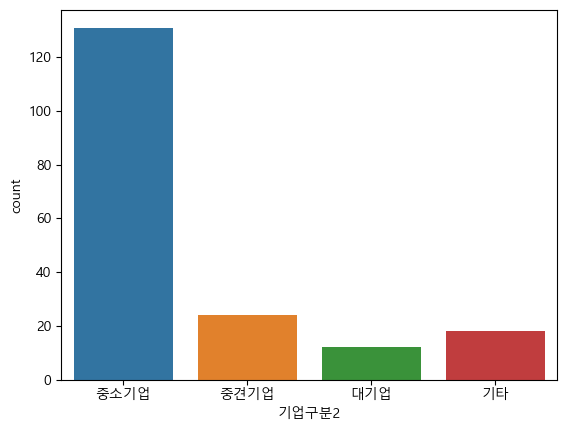

In [63]:
sns.countplot(x='기업구분2', data=corp);

- 중소기업의 수가 압도적으로 많다.

#### 기업구분에 따른 사원수

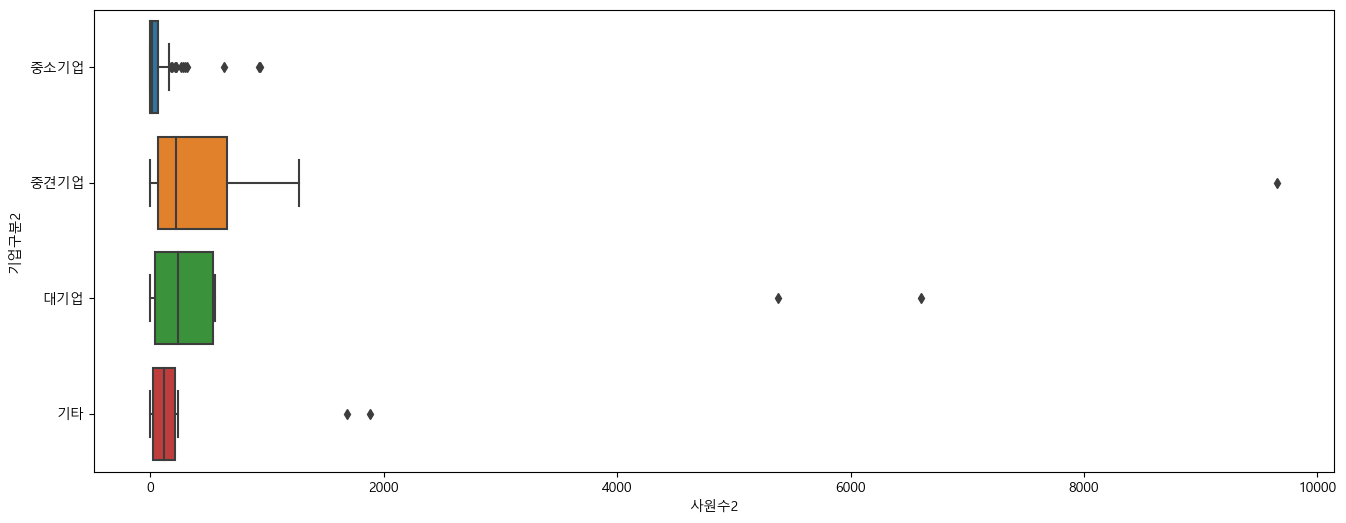

In [68]:
plt.figure(figsize=(16,6))
sns.boxplot(x='사원수2', y='기업구분2', data=corp)
plt.show()

- 중견기업, 대기업, 기타 ==> 이상치 제거 필요
- 중소기업은 max로 해서 가장 큰 값 두개 만 제거하자

#### 기업구분에 따른 별점 상자그래프

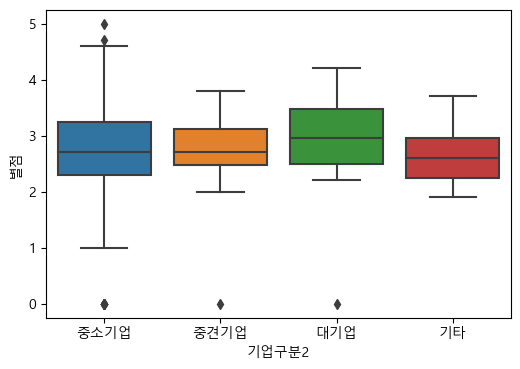

In [73]:
plt.figure(figsize=(6,4))
# sns.boxplot(x='별점', y='기업구분2', data=corp)
sns.boxplot(x='기업구분2', y='별점', data=corp)
plt.show()

- 별점은 이상치 제거하면 안될것 같다. 
- 별점은 이상치가 더 중요한 데이터 값  --> 과연?

In [74]:
corp

,Unnamed: 0,기업명,기업구분2,기업구분,사원수2,사원수,설립일(업력),홈페이지,지역,별점,입사율,퇴사율
0,1,(주)페이타랩,중소기업,"중소기업, 스타트업, 주식회사, 병역특례..",52,52 명 (2022년 기준),2018년 2월 28일 (업력 4년),passorder.co.kr,부산 부산진구,4.3,114.71 % (39 명),64.71 % (22 명)
1,3,(주)엠제이플렉스,중소기업,"중소기업, 스타트업, 외부감사법인, 주식..",930,930 명 (2022년 기준),2005년 3월 24일 (업력 17년),www.mjplex.co.kr,서울 구로구,2.3,89.94 % (876 명),97.84 % (953 명)
2,5,(주)앰진,중소기업,"중소기업, 주식회사",0,0,2012년 6월 13일 (업력 10년),www.amgine.co.kr,서울 송파구,3.0,40.00 % (8 명),30.00 % (6 명)
3,6,(주)도킹블록,중소기업,"중소기업, 주식회사",11,11 명 (2022년 기준),2019년 3월 6일 (업력 3년),dockingblock.com,서울 강남구,0.0,120.00 % (6 명),100.00 % (5 명)
4,7,(주)헥토이노베이션,중소기업,"코스닥, 중소기업, 주식회사, 병역특례 ..",140,140 명 (2022년 기준),0,https://www.hectoinnovation.co.kr/,서울 강남구,3.3,120.00 % (6 명),100.00 % (5 명)
...,...,...,...,...,...,...,...,...,...,...,...,...
180,107,(주)유니텍,기타,"외부감사법인, 주식회사",36,36 명 (2022년 기준),0,www.unitech.co.kr,경기 안양시,2.2,8.82 % (3 명),23.53 % (8 명)
181,126,(주)우리기술,기타,"코스닥, 외부감사법인, 수출입 기업",115,115 명 (2022년 기준),1995년 1월 12일 (업력 27년),www.wooritg.com,서울 마포구,2.2,8.77 % (10 명),5.26 % (6 명)
182,131,한국쓰리엠(주),기타,"외국 법인기업, 외부감사법인, 연구소, ..",1686,1686 명 (2022년 기준),1977년 9월 17일 (업력 45년),www.3m.co.kr,서울 영등포구,3.7,7.25 % (88 명),8.00 % (97 명)
183,135,에스지에이(주),기타,"코스닥, 외국인 투자기업, 외부감사법인",193,193 명 (2022년 기준),1997년 11월 21일 (업력 25년),www.sgacorp.kr,서울 송파구,2.5,80.61 % (158 명),70.92 % (139 명)


- 설립일(업력) 컬럼에서 업력 숫자 데이터만 가져올 필요성 있음
- 지역 컬럼에서 시, 구 나눠보는건 어떨까?
- 입사율과 퇴사율 컬럼을 사용하려면 float형으로 변환이 필요  --> % 데이터만 가져올까?

## 12/19

## 기업 사원수 0값 Search & 채우기

In [ ]:
# 57, 콴텍(주), 24, 2013년 04월 15일 (업력 13년)

In [1]:
def insert_emp(index, employee, date=None):
    corp.at[index,'사원수2'] = employee
    corp.at[index,'설립일(업력)'] = str(date)

In [18]:
insert_emp(57, 24, '2013년 04월 15일 (업력 13년)')

In [19]:
corp.loc[57]

Unnamed: 0                        82
기업명                            콴텍(주)
기업구분2                           중소기업
기업구분                중소기업, 스타트업, 주식회사
사원수2                              24
사원수                                0
설립일(업력)       2013년 04월 15일 (업력 13년)
홈페이지               www.quantec.co.kr
지역                           서울 영등포구
별점                               2.9
입사율                  122.22 % (22 명)
퇴사율                   94.44 % (17 명)
Name: 57, dtype: object

## EDA 간단히 그래프로

In [21]:
url = 'https://raw.githubusercontent.com/ghltorrhdiddl2/ml-project-3/main/EDA%26Preprocessing/company1.csv'
company = pd.read_csv(url, encoding='utf-8')
company.head()

,Unnamed: 0.1,Unnamed: 0,기업명,기업구분2,기업구분,사원수2,사원수,설립일(업력),홈페이지,지역,별점,입사율,퇴사율
0,0,0,(주)페이타랩,중소기업,"중소기업, 스타트업, 주식회사, 병역특례..",52,52 명 (2022년 기준),2018년 2월 28일 (업력 4년),passorder.co.kr,부산 부산진구,4.3,114.71 % (39 명),64.71 % (22 명)
1,1,1,(주)엠제이플렉스,중소기업,"중소기업, 스타트업, 외부감사법인, 주식..",930,930 명 (2022년 기준),2005년 3월 24일 (업력 17년),www.mjplex.co.kr,서울 구로구,2.3,89.94 % (876 명),97.84 % (953 명)
2,2,2,(주)앰진,중소기업,"중소기업, 주식회사",20,20 명 (2022년 기준),2012년 6월 13일 (업력 10년),www.amgine.co.kr,서울 송파구,3.0,40.00 % (8 명),30.00 % (6 명)
3,3,3,(주)도킹블록,중소기업,"중소기업, 주식회사",11,11 명 (2022년 기준),2019년 3월 6일 (업력 3년),dockingblock.com,서울 강남구,0.0,120.00 % (6 명),100.00 % (5 명)
4,4,4,(주)헥토이노베이션,중소기업,"코스닥, 중소기업, 주식회사, 병역특례 ..",140,140 명 (2022년 기준),0,https://www.hectoinnovation.co.kr/,서울 강남구,3.3,120.00 % (6 명),100.00 % (5 명)
